In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
from google.colab import files
uploaded = files.upload()

Saving archive (3).zip to archive (3).zip


In [12]:
import zipfile
with zipfile.ZipFile("archive (3).zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [19]:
import os

# List files after extraction
print(os.listdir("."))   # top level
print(os.listdir("ml-100k"))  # inside the extracted folder


['.config', 'ml-100k', 'archive (3).zip', 'sample_data']
['ub.test', 'u.data', 'u5.base', 'allbut.pl', 'u.info', 'ub.base', 'ua.test', 'u.genre', 'mku.sh', 'u.user', 'u.item', 'u3.test', 'u.occupation', 'u4.test', 'u1.test', 'ua.base', 'u3.base', 'README', 'u5.test', 'u4.base', 'u2.base', 'u1.base', 'u2.test']


In [20]:
# Load ratings (u.data)
ratings = pd.read_csv(
    "ml-100k/u.data",
    sep="\t",
    names=["user_id", "movie_id", "rating", "timestamp"]
)

# Load movies (u.item)
movies = pd.read_csv(
    "ml-100k/u.item",
    sep="|",
    names=["movie_id", "title", "release_date", "video_release_date", "IMDb_URL",
           "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime",
           "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery",
           "Romance", "Sci-Fi", "Thriller", "War", "Western"],
    encoding="latin-1"
)

# Load users (u.user)
users = pd.read_csv(
    "ml-100k/u.user",
    sep="|",
    names=["user_id", "age", "gender", "occupation", "zip_code"]
)

# Quick checks
print("Ratings:\n", ratings.head(), "\n")
print("Movies:\n", movies.head(), "\n")
print("Users:\n", users.head(), "\n")

Ratings:
    user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596 

Movies:
    movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Sh

In [48]:
print("ratings dtypes:\n", ratings.dtypes)
print("\nmovies dtypes:\n", movies.dtypes)
print("\nusers dtypes:\n", users.dtypes)
# missing values
print("\nMissing values:")
print("ratings:\n", ratings.isnull().sum())
print("movies:\n", movies.isnull().sum())
print("users:\n", users.isnull().sum())
# duplicates
print("\nDuplicates:")
print("ratings duplicated rows:", ratings.duplicated().sum())
print("movies duplicated movie_id:", movies.duplicated(subset=["movie_id"]).sum())
print("users duplicated user_id:", users.duplicated(subset=["user_id"]).sum())

ratings dtypes:
 user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

movies dtypes:
 movie_id                int64
title                  object
release_date           object
video_release_date    float64
IMDb_URL               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children's              int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
dtype: object

users dtypes:
 user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

Missin

In [21]:
print(ratings.shape, ratings.info())
print(movies.shape, movies.info())
print(users.shape, users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
(100000, 4) None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   

In [22]:
print(ratings["rating"].describe())
print("Unique users:", ratings["user_id"].nunique())
print("Unique movies:", ratings["movie_id"].nunique())

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
Unique users: 943
Unique movies: 1682


In [23]:
ratings_movies = pd.merge(ratings, movies[["movie_id", "title"]], on="movie_id")
ratings_movies.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [24]:
print("Ratings:", ratings.shape)
print("Movies:", movies.shape)
print("Users:", users.shape)

Ratings: (100000, 4)
Movies: (1682, 24)
Users: (943, 5)


In [49]:
# timestamp -> datetime
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit="s")
# movie release_date parse (some may be NaT)
movies["release_date"] = pd.to_datetime(movies["release_date"], format="%d-%b-%Y", errors="coerce")
# ensure types
users["age"] = users["age"].astype(int)
# quick check
print(ratings.head())
print(movies[["movie_id","title","release_date"]].head())

   user_id  movie_id  rating           timestamp
0      196       242       3 1997-12-04 15:55:49
1      186       302       3 1998-04-04 19:22:22
2       22       377       1 1997-11-07 07:18:36
3      244        51       2 1997-11-27 05:02:03
4      166       346       1 1998-02-02 05:33:16
   movie_id              title release_date
0         1   Toy Story (1995)   1995-01-01
1         2   GoldenEye (1995)   1995-01-01
2         3  Four Rooms (1995)   1995-01-01
3         4  Get Shorty (1995)   1995-01-01
4         5     Copycat (1995)   1995-01-01


In [26]:
ratings_movies = pd.merge(ratings, movies[["movie_id", "title"]], on="movie_id")

top_movies = (
    ratings_movies.groupby("title")["rating"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print(top_movies)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64


In [27]:
movie_stats = ratings_movies.groupby("title").agg(
    count=("rating", "count"),
    mean=("rating", "mean")
)

popular_highly_rated = movie_stats[movie_stats["count"] >= 50].sort_values(
    "mean", ascending=False
).head(10)

print(popular_highly_rated)

                                                    count      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000


In [28]:
active_users = ratings.groupby("user_id")["rating"].count().sort_values(ascending=False).head(10)
print(active_users)

user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
Name: rating, dtype: int64


📊 1. Ratings Distribution

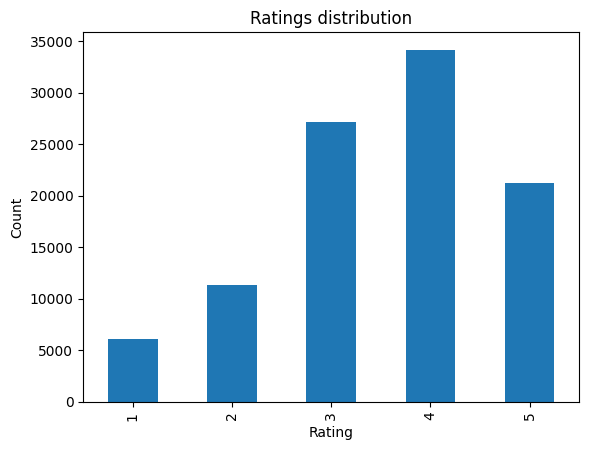

In [25]:
ratings["rating"].value_counts().sort_index().plot(
    kind="bar", title="Ratings distribution"
)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

📊 2. Number of Ratings per Movie

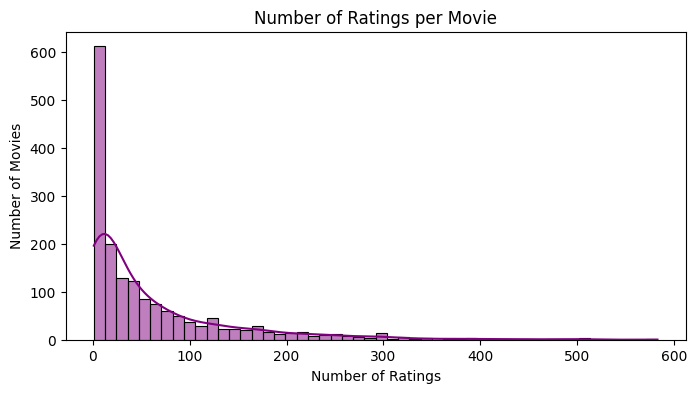

In [34]:
ratings_per_movie = ratings.groupby("movie_id")["rating"].count()
plt.figure(figsize=(8,4))
sns.histplot(ratings_per_movie, bins=50, kde=True, color="purple")
plt.title("Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()

📊 3. Top 10 Most Rated Movies

/tmp/ipython-input-1488430555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movies.index, palette="viridis")


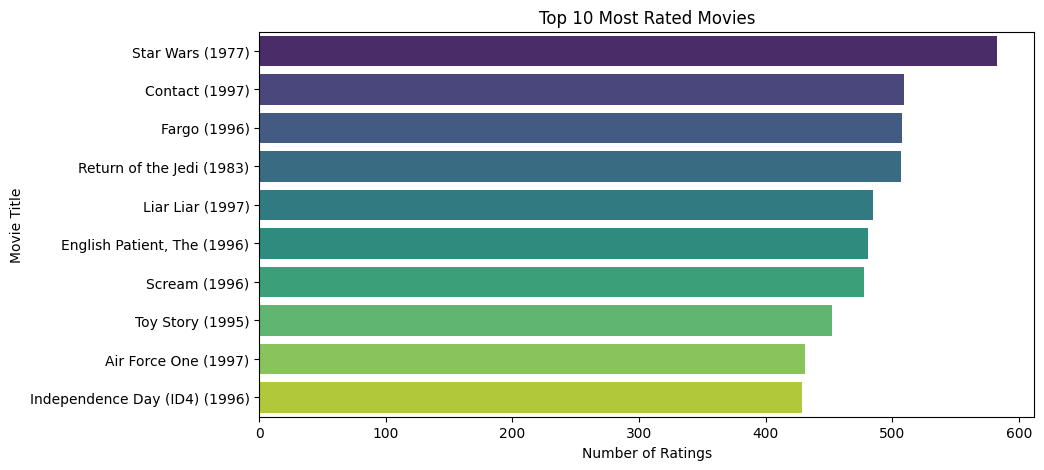

In [35]:
ratings_movies = pd.merge(ratings, movies[["movie_id", "title"]], on="movie_id")
top10_movies= ratings_movies['title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_movies.values, y=top_movies.index, palette="viridis")
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()

📊 4. Average Ratings of Top Popular Movies

/tmp/ipython-input-1423794710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_movies["mean"], y=popular_movies.index, palette="coolwarm")


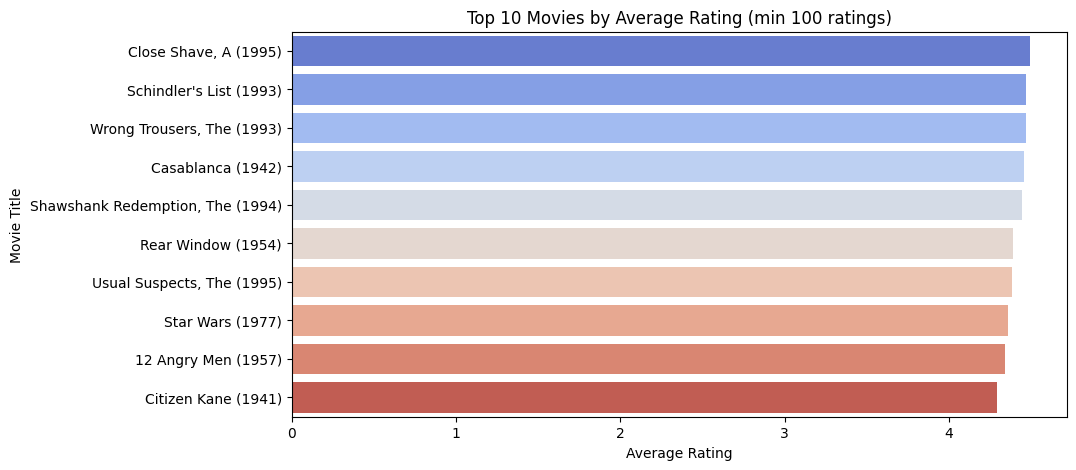

In [36]:
movie_stats = ratings_movies.groupby("title").agg(
    count=("rating", "count"),
    mean=("rating", "mean")
)
popular_movies = movie_stats.query("count >= 100").sort_values("mean", ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=popular_movies["mean"], y=popular_movies.index, palette="coolwarm")
plt.title("Top 10 Movies by Average Rating (min 100 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

📊 5. User Age Distribution

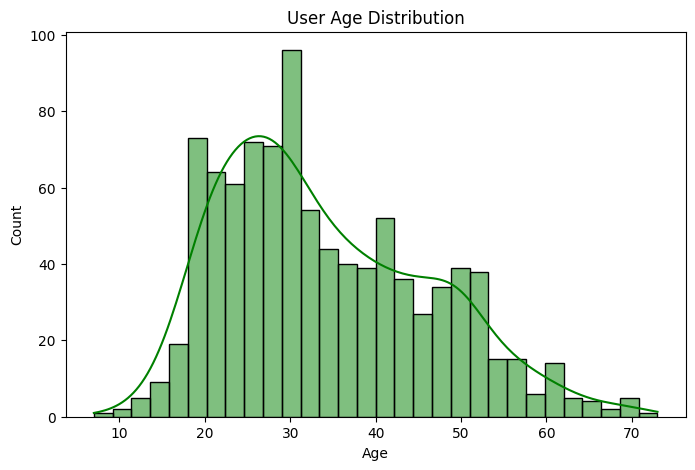

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(users["age"], bins=30, kde=True, color="green")
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [38]:
# Merge ratings + movies + users
data = ratings.merge(movies[["movie_id", "title", "Comedy", "Drama", "Action", "Romance", "Sci-Fi"]], on="movie_id")
data = data.merge(users[["user_id", "gender"]], on="user_id")
print(data.head())

   user_id  movie_id  rating  timestamp                       title  Comedy  \
0      196       242       3  881250949                Kolya (1996)       1   
1      186       302       3  891717742    L.A. Confidential (1997)       0   
2       22       377       1  878887116         Heavyweights (1994)       1   
3      244        51       2  880606923  Legends of the Fall (1994)       0   
4      166       346       1  886397596         Jackie Brown (1997)       0   

   Drama  Action  Romance  Sci-Fi gender  
0      0       0        0       0      M  
1      0       0        0       0      F  
2      0       0        0       0      M  
3      1       0        1       0      M  
4      1       0        0       0      M  


📊 7. Average Ratings by Gender for Top Genres

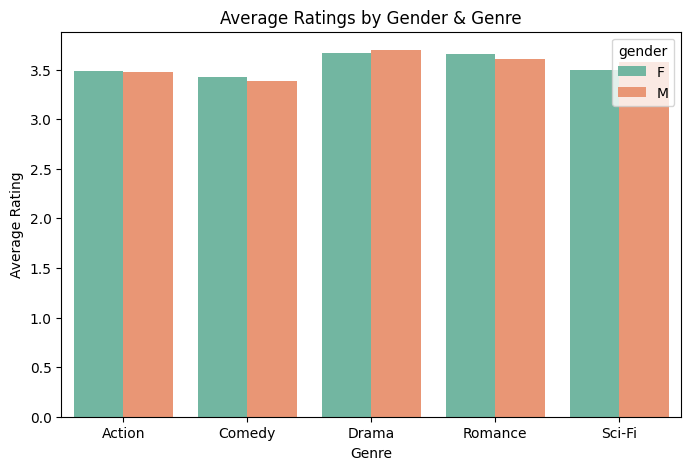

In [39]:
genre_cols = ["Comedy", "Drama", "Action", "Romance", "Sci-Fi"]
# Melt into long format
genre_data = data.melt(
    id_vars=["user_id", "gender", "rating"],
    value_vars=genre_cols,
    var_name="genre",
    value_name="is_genre"
)
# Keep only rows where is_genre == 1
genre_data = genre_data[genre_data["is_genre"] == 1]
# Compute mean rating per gender & genre
avg_ratings = genre_data.groupby(["gender", "genre"])["rating"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_ratings, x="genre", y="rating", hue="gender", palette="Set2")
plt.title("Average Ratings by Gender & Genre")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.show()

📊 8. Number of Ratings by Gender & Genre

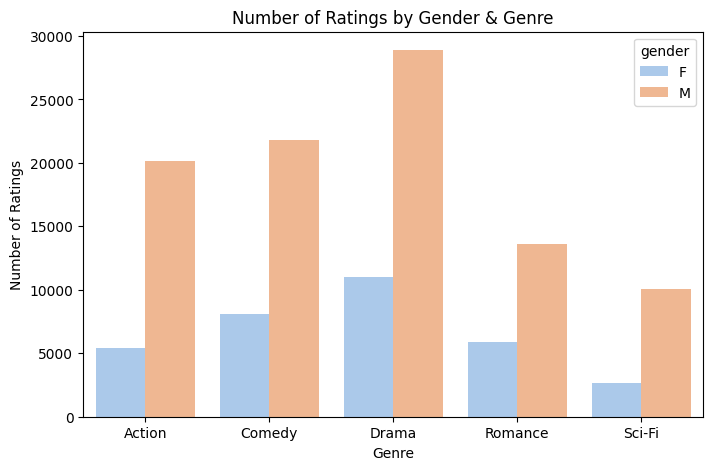

In [40]:
count_ratings = genre_data.groupby(["gender", "genre"])["rating"].count().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=count_ratings, x="genre", y="rating", hue="gender", palette="pastel")
plt.title("Number of Ratings by Gender & Genre")
plt.ylabel("Number of Ratings")
plt.xlabel("Genre")
plt.show()

# **NEXT STEP**

In [41]:
ratings_movies = pd.merge(ratings, movies[["movie_id", "title"]], on="movie_id")

user_movie_matrix = ratings_movies.pivot_table(
    index="user_id",
    columns="title",
    values="rating"
)

print(user_movie_matrix.shape)
user_movie_matrix.head()

(943, 1664)


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [42]:
# Choose a movie (example: "Star Wars (1977)")
movie_ratings = user_movie_matrix["Star Wars (1977)"]
# Compute correlation with other movies
similar_movies = user_movie_matrix.corrwith(movie_ratings)
# Drop NaNs and build DataFrame
corr_starwars = pd.DataFrame(similar_movies, columns=["Correlation"])
corr_starwars.dropna(inplace=True)
# Add number of ratings
movie_stats = ratings_movies.groupby("title")["rating"].count()
corr_starwars = corr_starwars.join(movie_stats)
# Filter only movies with >= 100 ratings
recommendations = corr_starwars[corr_starwars["rating"] >= 100].sort_values("Correlation", ascending=False).head(10)
print(recommendations)

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


                                                    Correlation  rating
title                                                                  
Star Wars (1977)                                       1.000000     583
Empire Strikes Back, The (1980)                        0.747981     367
Return of the Jedi (1983)                              0.672556     507
Raiders of the Lost Ark (1981)                         0.536117     420
Austin Powers: International Man of Mystery (1997)     0.377433     130
Sting, The (1973)                                      0.367538     241
Indiana Jones and the Last Crusade (1989)              0.350107     331
Pinocchio (1940)                                       0.347868     101
Frighteners, The (1996)                                0.332729     115
L.A. Confidential (1997)                               0.319065     297


In [43]:
def recommend_movies(movie_name, min_ratings=100):
    movie_ratings = user_movie_matrix[movie_name]
    similar = user_movie_matrix.corrwith(movie_ratings)
    corr_df = pd.DataFrame(similar, columns=["Correlation"])
    corr_df.dropna(inplace=True)
    movie_stats = ratings_movies.groupby("title")["rating"].count()
    corr_df = corr_df.join(movie_stats)
    return corr_df[corr_df["rating"] >= min_ratings].sort_values("Correlation", ascending=False).head(10)
# Example
print(recommend_movies("Toy Story (1995)"))

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


                               Correlation  rating
title                                             
Toy Story (1995)                  1.000000     452
Craft, The (1996)                 0.549100     104
Down Periscope (1996)             0.457995     101
Miracle on 34th Street (1994)     0.456291     101
G.I. Jane (1997)                  0.454756     175
Amistad (1997)                    0.449915     124
Beauty and the Beast (1991)       0.442960     202
Mask, The (1994)                  0.432855     129
Cinderella (1950)                 0.428372     129
That Thing You Do! (1996)         0.427936     176


TTTT

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
# Fill NaNs with 0 (unrated = 0 for similarity computation)
user_matrix_filled = user_movie_matrix.fillna(0)
# Compute cosine similarity between users
user_similarity = cosine_similarity(user_matrix_filled)
# Convert to DataFrame
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_movie_matrix.index,
    columns=user_movie_matrix.index
)
print(user_similarity_df.head())

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.168937  0.048388  0.064561  0.379670  0.429682  0.443097   
2        0.168937  1.000000  0.113393  0.179694  0.073623  0.242106  0.108604   
3        0.048388  0.113393  1.000000  0.349781  0.021592  0.074018  0.067423   
4        0.064561  0.179694  0.349781  1.000000  0.031804  0.068431  0.091507   
5        0.379670  0.073623  0.021592  0.031804  1.000000  0.238636  0.374733   

user_id       8         9         10   ...       934       935       936  \
user_id                                ...                                 
1        0.320079  0.078385  0.377733  ...  0.372213  0.119860  0.269860   
2        0.104257  0.162470  0.161273  ...  0.147095  0.310661  0.363328   
3        0.084419  0.062039  0.066217  ...  0.033885  0.043453  0.167140   
4        0.188060  0.101284  0.060859  ...  0.054615

In [46]:
def get_similar_users(user_id, n=5):
    # Sort similarity scores for the user
    sim_users = user_similarity_df[user_id].sort_values(ascending=False)
    # Drop self (similarity = 1.0 with themselves)
    sim_users = sim_users.drop(user_id)
    return sim_users.head(n)
print(get_similar_users(1))

user_id
916    0.566293
864    0.549277
457    0.541364
92     0.539415
268    0.538883
Name: 1, dtype: float64


In [47]:
def recommend_for_user(user_id, n_similar=5, n_recommend=5):
    # Find similar users
    similar_users = get_similar_users(user_id, n=n_similar).index
    # Movies rated by similar users
    similar_users_ratings = user_movie_matrix.loc[similar_users].mean().sort_values(ascending=False)
    # Movies the target user has already rated
    target_user_movies = user_movie_matrix.loc[user_id].dropna().index
    # Exclude already watched movies
    recommendations = similar_users_ratings.drop(target_user_movies, errors="ignore")
    return recommendations.head(n_recommend)
# Example: recommend for user 1
print(recommend_for_user(1))

title
Wings of Desire (1987)                5.0
People vs. Larry Flynt, The (1996)    5.0
Shadowlands (1993)                    5.0
Casablanca (1942)                     5.0
Chinatown (1974)                      5.0
dtype: float64


In [53]:
from sklearn.decomposition import TruncatedSVD

In [54]:
user_item_matrix = ratings.pivot_table(
    index="user_id",
    columns="movie_id",
    values="rating"
).fillna(0)

In [55]:
svd = TruncatedSVD(n_components=20, random_state=42)
matrix_reduced = svd.fit_transform(user_item_matrix)

In [56]:
approx_ratings = np.dot(matrix_reduced, svd.components_)
pred_df = pd.DataFrame(
    approx_ratings,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

In [57]:
def recommend_movies(user_id, preds, ratings, movies, top_n=5):
    # Movies already rated
    rated = ratings[ratings["user_id"] == user_id]["movie_id"].tolist()
    # Predicted ratings for all movies
    user_preds = preds.loc[user_id].drop(rated).sort_values(ascending=False).head(top_n)
    return movies[movies["movie_id"].isin(user_preds.index)][["movie_id", "title"]].assign(
        predicted_rating=user_preds.values
    )

In [58]:
recommend_movies(1, pred_df, ratings, movies, top_n=5)

,movie_id,title,predicted_rating
274,275,Sense and Sensibility (1995),3.958260
422,423,E.T. the Extra-Terrestrial (1982),3.361876
432,433,Heathers (1989),3.263087
474,475,Trainspotting (1996),3.241236
482,483,Casablanca (1942),3.226547


In [59]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

In [60]:
train_matrix = train.pivot_table(
    index="user_id",
    columns="movie_id",
    values="rating"
).fillna(0)

In [61]:
svd = TruncatedSVD(n_components=20, random_state=42)
train_reduced = svd.fit_transform(train_matrix)
# Reconstruct approximate ratings
train_preds = np.dot(train_reduced, svd.components_)
pred_df = pd.DataFrame(
    train_preds,
    index=train_matrix.index,
    columns=train_matrix.columns
)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Collect actual and predicted ratings
y_true, y_pred = [], []
for row in test.itertuples(index=False):
    user, movie, rating = row.user_id, row.movie_id, row.rating
    if user in pred_df.index and movie in pred_df.columns:
        y_true.append(rating)
        y_pred.append(pred_df.loc[user, movie])
# Compute metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

RMSE: 2.6401
MAE: 2.3709
